# Displaying the Timeline of the Scheduler

In [11]:
# Collect the logs of the events of scheduled pods
!kubectl get events -A --sort-by=.metadata.creationTimestamp --field-selector reason=Scheduled -o json > temp.log

In [12]:
# Loading event json
import json

# Plotting the timeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [13]:
with open('temp.log', 'r') as file:
    data = json.load(file)

In [14]:
# Filter out the scheduling events that weren't carried out by our scheduler
sched_name = 'basic-sched'
basic_sched_events = [ x for x in data['items'] if  x['reportingComponent'] == sched_name]

In [15]:
# Select the most recent events
latest = 10
basic_sched_events = basic_sched_events[-10:]

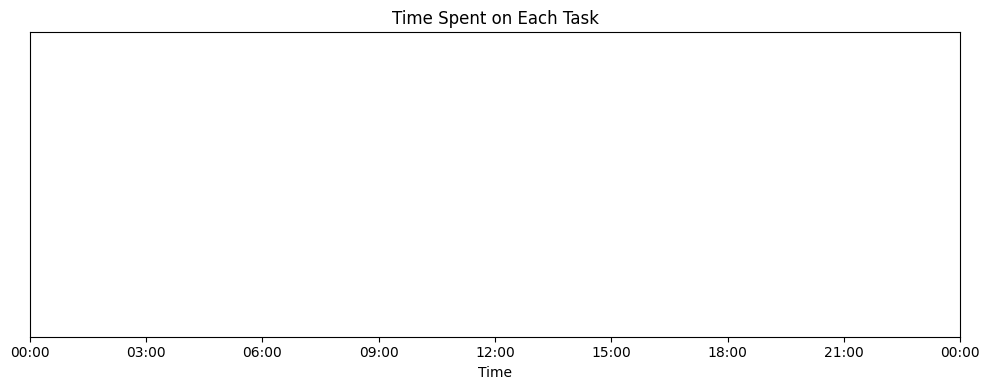

In [16]:
# Convert string timestamps to datetime objects and compute durations (in hours)
for event in basic_sched_events:
    event["end_dt"] = datetime.fromisoformat(event["eventTime"])
    event["duration"] = timedelta(microseconds= int(event['metadata']['annotations']['scheduler/nanoseconds']) / 1000)
    #event["start_dt"] = event["end_dt"] - duration_td

# Create the plot
fig, ax = plt.subplots(figsize=(10, 4))

# Plot each scheduling event as a horizontal bar
for i, event in enumerate(basic_sched_events):
    ax.barh(i, event["duration"], left = event["end_dt"] - event["duration"], height=0.4, align='center')

# Set y-axis with component names
ax.set_yticks(range(len(basic_sched_events)))
ax.set_yticklabels([event["involvedObject"]["name"] for event in basic_sched_events])

# Format the x-axis to show time (using hours and minutes)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xlabel("Time")
plt.title("Time Spent on Each Task")
plt.tight_layout()
plt.show()


In [17]:
[(event["involvedObject"]["name"], event['metadata']['annotations']['scheduler/nanoseconds']) for event in basic_sched_events]

[]

In [18]:
[(event["involvedObject"]["name"], event['eventTime']) for event in basic_sched_events]

[]